### 1. Importing required libraries, loading data and defining parameters to be used

In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("fivethirtyeight")

In [2]:
file = './customer_rfm_scores.csv'
columns_to_load = ['CustomerId', 'R_score', 'F_score', 'M_score']
data = pd.read_csv(file, index_col=0, usecols=columns_to_load)

In [3]:
data.describe()

,R_score,F_score,M_score
count,50000.000000,50000.000000,50000.000000
mean,50.035524,50.001000,50.001000
std,28.887435,28.735875,28.867802
min,0.002000,3.935000,0.002000
25%,24.951220,30.522000,25.007000
50%,50.135590,51.272000,50.000000
75%,75.206890,74.910000,74.999750
max,100.000000,100.000000,100.000000


In [4]:
seed = 12345

kmeans_kwargs = {
    'init': 'random',
    'n_init': 10,
    'max_iter': 500,
    'random_state': seed,
 }

### 2. Defining a "optimal" number of clusters k using the "elbow method"*
*Note: The data doesn´t need to be scaled, because that it already is (range of values goes from (almost) 0 to 100).

In [5]:
sse = [] # sum of squared errors

for k in range(1, 15):
    model = KMeans(n_clusters=k, **kmeans_kwargs)
    model.fit(data)
    sse.append(model.inertia_)

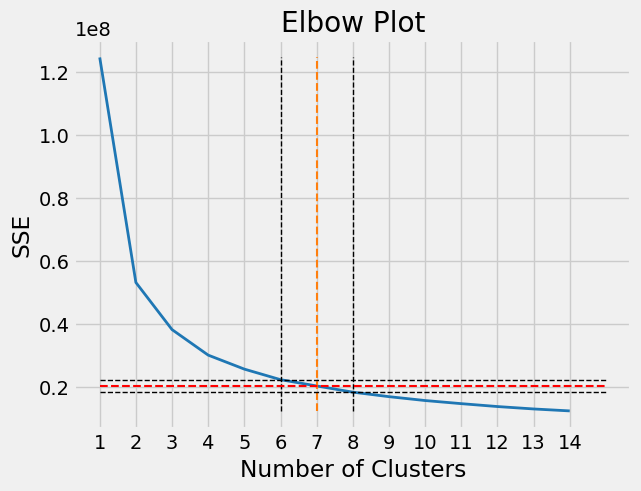

In [6]:
plt.plot(range(1, 15), sse, linewidth=2, color='tab:blue')
plt.xticks(range(1, 15))
plt.vlines(7, min(sse), max(sse), colors='tab:orange', linestyle='--', linewidth=1.5)
plt.vlines(6, min(sse), max(sse), colors='black', linestyle='--', linewidth=1)
plt.vlines(8, min(sse), max(sse), colors='black', linestyle='--', linewidth=1)
plt.hlines(sse[6] , 1, 15, colors='red', linestyle='--', linewidth=1.5)
plt.hlines(sse[7] , 1, 15, colors='black', linestyle='--', linewidth=1)
plt.hlines(sse[5] , 1, 15, colors='black', linestyle='--', linewidth=1)
plt.xlabel('Number of Clusters')
plt.ylabel('SSE')
plt.title('Elbow Plot')
plt.show()

### 3. Building model with "optimal" number of clusters k*, and inserting cluster labels to data
*Note: From the "elbow method" plot (see above), it can be seen that k=7 seems to be a proper number of clusters to be used.

In [7]:
k = 7
model = KMeans(n_clusters=k, **kmeans_kwargs)
model.fit(data)

KMeans(init='random', max_iter=500, n_clusters=7, random_state=12345)

In [8]:
data['Cluster_Label'] = model.labels_

In [9]:
data

,R_score,F_score,M_score,Cluster_Label
CustomerId,,,,
Cust-00001,39.28110,68.422,16.376,1
Cust-00002,54.57566,79.162,89.999,2
Cust-00003,84.23512,99.273,97.776,5
Cust-00004,41.20843,79.162,60.142,3
Cust-00005,95.65800,96.329,97.440,5
...,...,...,...,...
Cust-49996,47.88404,16.241,44.104,6
Cust-49997,61.06714,68.422,76.368,2
Cust-49998,10.70839,3.935,3.984,0


### 4. Analysing clusters obtained from model

In [10]:
color_map = {
    0:'tab:blue', 1:'tab:orange',
    2:'tab:green', 3:'tab:red',
    4:'tab:purple', 5:'tab:brown',
    6:'tab:pink',
}

color_list = [i for i in color_map.values()]


label_color = [color_map[i] for i in model.labels_]

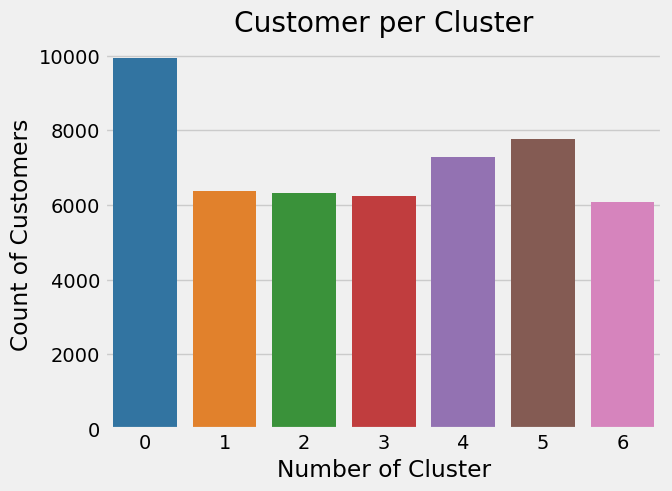

In [11]:
# how many customer per cluster?

sns.countplot(x=data['Cluster_Label'], palette=color_map)
plt.xlabel('Number of Cluster')
plt.ylabel('Count of Customers')
plt.title('Customer per Cluster')
plt.show()

- The customers are well distributed among the clusters (except fro cluster 0). 

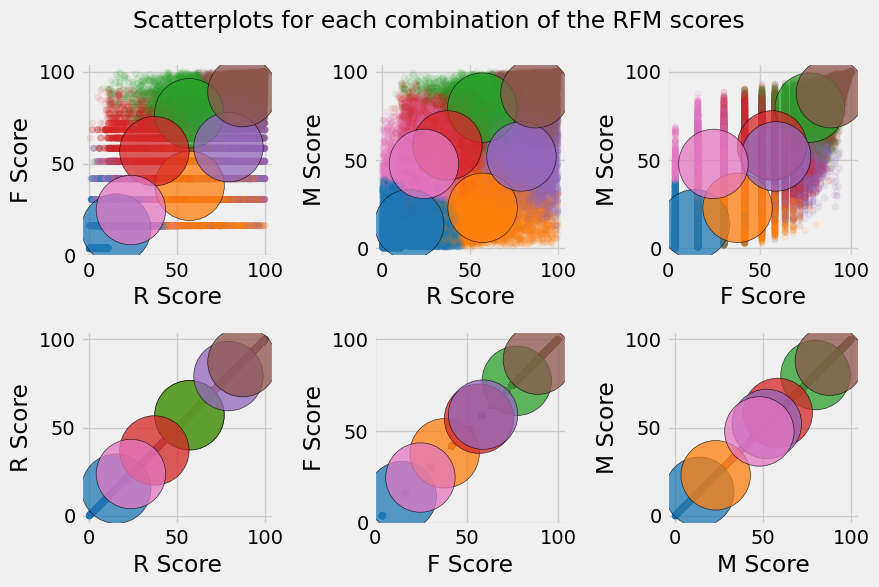

In [12]:
# scatterplot of clusters by each combination of the RFM scores

centroids = model.cluster_centers_ 

fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(9, 6))#, squeeze=False)

axs[0,0].scatter(data['R_score'], data['F_score'], c=label_color, alpha=0.1, s=20)
axs[0,0].scatter(centroids[:,0], centroids[:,1], c=color_list, s=2500, alpha=0.75, edgecolors='black')
axs[0,0].set_xlabel('R Score')
axs[0,0].set_ylabel('F Score')

axs[0,1].scatter(data['R_score'], data['M_score'], c=label_color, alpha=0.1, s=20)
axs[0,1].scatter(centroids[:,0], centroids[:,2], c=color_list, s=2500, alpha=0.75, edgecolors='black')
axs[0,1].set_xlabel('R Score')
axs[0,1].set_ylabel('M Score')

axs[0,2].scatter(data['F_score'], data['M_score'], c=label_color, alpha=0.1, s=20)
axs[0,2].scatter(centroids[:,1], centroids[:,2], c=color_list, s=2500, alpha=0.75, edgecolors='black')
axs[0,2].set_xlabel('F Score')
axs[0,2].set_ylabel('M Score')

axs[1,0].scatter(data['R_score'], data['R_score'], c=label_color, alpha=0.1, s=20)
axs[1,0].scatter(centroids[:,0], centroids[:,0], c=color_list, s=2500, alpha=0.75, edgecolors='black')
axs[1,0].set_xlabel('R Score')
axs[1,0].set_ylabel('R Score')

axs[1,1].scatter(data['F_score'], data['F_score'], c=label_color, alpha=0.1, s=20)
axs[1,1].scatter(centroids[:,1], centroids[:,1], c=color_list, s=2500, alpha=0.75, edgecolors='black')
axs[1,1].set_xlabel('F Score')
axs[1,1].set_ylabel('F Score')

axs[1,2].scatter(data['M_score'], data['M_score'], c=label_color, alpha=0.1, s=20)
axs[1,2].scatter(centroids[:,2], centroids[:,2], c=color_list, s=2500, alpha=0.75, edgecolors='black')
axs[1,2].set_xlabel('M Score')
axs[1,2].set_ylabel('M Score')

fig.suptitle('Scatterplots for each combination of the RFM scores')
fig.tight_layout()
plt.show()

From the scatterplots, it seems that:

---

- Cluster 0 (blue): related to low R, F and M... meaning customers that bought a long time ago, probably 1 or 2 times, an a low amount... they could be labeled as **"Lost"**.

---

- Cluster 1 (orange): related to mediwm R, low F and M... meaning customers that bought a while ago, probably 1 or 2 times and  low amounts... they could be labeled as **"Dormant"**... how to address them to attract them? 
---

- Cluster 2 (green): related to mediwm R, high F and M... meaning customers that bought a while ago, several times and accumulating a high amount... they could be labeled as **"Need Attention"**... how to address them to attract them? 

---

- Cluster 3 (red): related to low R, medium F and M... meaning customers that bought a long time ago, repeteadly and accumulating a considerable amount... they could be labeled as **"At Risk"**... how to address them to avoid losing them?

---

- Cluster 4 (purple): related to High R, medium F and M... meaning customers that bought recently, several times, and accumulating a considerable amount... they could be labeled as **"Potential Loyal"**... how to address them to convert them to "Loyal"?

---

- Cluster 5 (brown): related to High R, F and M... meaning customers that bought recently, repeteadly and accumulating a high amount... they could be labeled as **"Loyal"**.

---

- Cluster 6 (pink): related to low R and F, and medium M... meaning customers that bought a long time ago, probably 1 or 2 times, an a considerable amount... they could be labeled as **"One-Time Buy"**.

---
From my experience, I think another category is missing **"New Customers"**.

### 5. Assigning categories an saving output to csv file

In [13]:
categories = [
    '1. Loyal',
    '2. Potential Loyal',
    '3. Need Attention',
    '4. At Risk' , 
    '5. One-Time Buy' , 
    '6. Dormant',
    '7. Lost'
]

conditions = [
    data['Cluster_Label']==5, # '1. Loyal'      
    data['Cluster_Label']==4, # '2. Potential Loyal'   
    data['Cluster_Label']==2, # '3. Need Attention'   
    data['Cluster_Label']==3, # '4. At Risk'  
    data['Cluster_Label']==6, # '5. One-Time Buy'  
    data['Cluster_Label']==1, # '6. Dormant' 
    data['Cluster_Label']==0, # '7. Lost' 
]

data['Customer_Category'] = np.select(conditions, categories)

In [14]:
data

,R_score,F_score,M_score,Cluster_Label,Customer_Category
CustomerId,,,,,
Cust-00001,39.28110,68.422,16.376,1,6. Dormant
Cust-00002,54.57566,79.162,89.999,2,3. Need Attention
Cust-00003,84.23512,99.273,97.776,5,1. Loyal
Cust-00004,41.20843,79.162,60.142,3,4. At Risk
Cust-00005,95.65800,96.329,97.440,5,1. Loyal
...,...,...,...,...,...
Cust-49996,47.88404,16.241,44.104,6,5. One-Time Buy
Cust-49997,61.06714,68.422,76.368,2,3. Need Attention
Cust-49998,10.70839,3.935,3.984,0,7. Lost


In [15]:
data.to_csv('./customer_rfm_clustering_output.csv')